In [2]:
import ast
import seaborn as sns
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

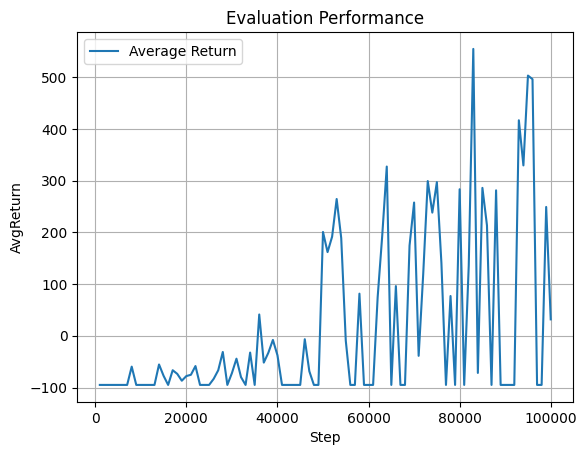

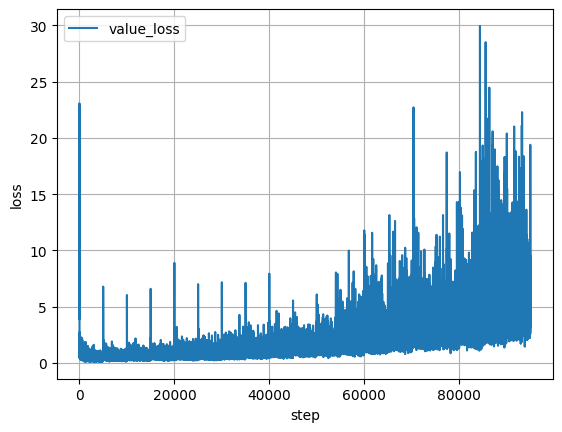

In [5]:

import pickle

with open("./data/DQN_ei_history.pkl", "rb") as f:
    data = pickle.load(f)

history = data

# 평균 리턴 그래프
plt.plot(history['Step'], history['AvgReturn'], label='Average Return')
plt.xlabel('Step')
plt.ylabel('AvgReturn')
plt.title('Evaluation Performance')
plt.grid(True)
plt.legend()
plt.show()

with open("data/DQN_ei_loss_history.pkl", "rb") as f:
    sdata = pickle.load(f)

history = sdata

# 화면에 표시
plt.plot( history['value_loss'], label='value_loss')
plt.xlabel("step")
plt.ylabel("loss")
plt.legend()
plt.grid(True)
plt.show()

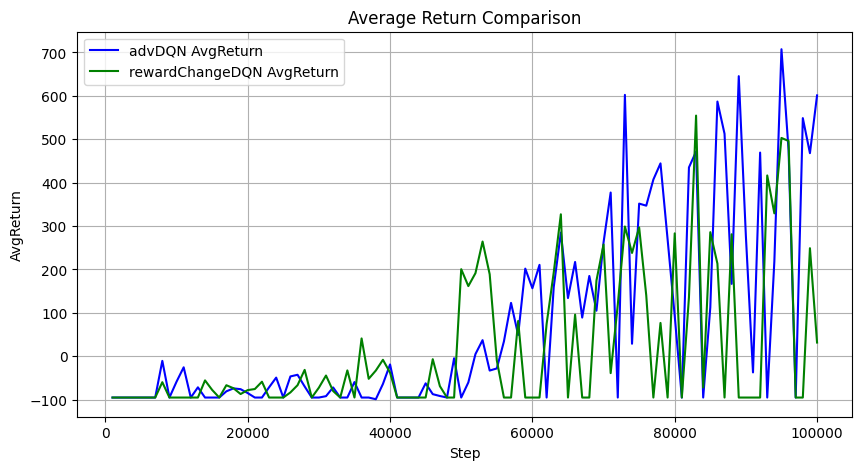

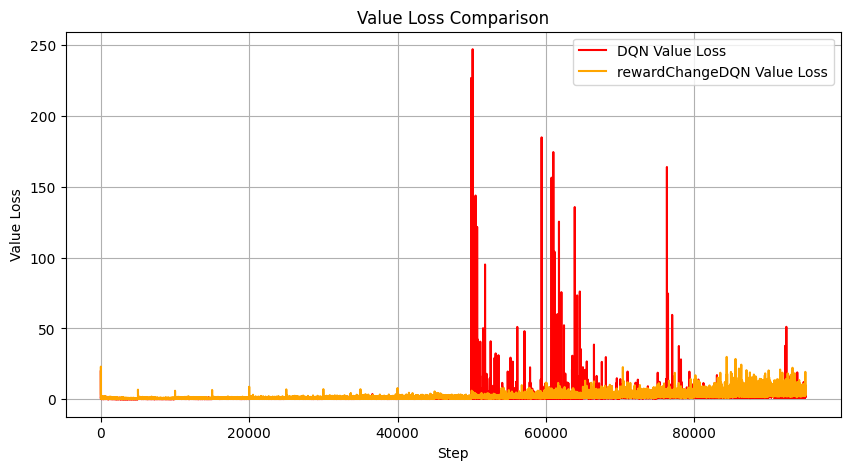

In [13]:
import pickle
import matplotlib.pyplot as plt

# 데이터 로드
with open("./data/advDQN_history.pkl", "rb") as f:
    advDQN_history = pickle.load(f)

with open("./data/advDQN_loss_history.pkl", "rb") as f:
    advDQN_loss_history = pickle.load(f)

with open("./data/DQN_ei_history.pkl", "rb") as f:
    DQN_history = pickle.load(f)

with open("./data/DQN_ei_loss_history.pkl", "rb") as f:
    DQN_loss_history = pickle.load(f)


plt.figure(figsize=(10, 5))
plt.plot(advDQN_history['Step'], advDQN_history['AvgReturn'], label='advDQN AvgReturn', color='blue')
plt.plot(DQN_history['Step'], DQN_history['AvgReturn'], label='rewardChangeDQN AvgReturn', color='green')
plt.xlabel('Step')
plt.ylabel('AvgReturn')
plt.title('Average Return Comparison')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot( advDQN_loss_history['value_loss'], label='DQN Value Loss', color='red')
plt.plot(DQN_loss_history['value_loss'], label='rewardChangeDQN Value Loss', color='orange')
plt.xlabel('Step')
plt.ylabel('Value Loss')
plt.title('Value Loss Comparison')
plt.grid(True)
plt.legend()
plt.show()


In [2]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F

from src.CNN import advCNNActionValue

import src.DQN as DQN
from src.Preprocess import preprocess, ImageEnv
from src.setPenaltyAndPreprocess import setPenaltyAndPreprocess

In [6]:
score_h= []

eval_env = gym.make('CarRacing-v2', continuous=False, render_mode='rgb_array')
eval_env = ImageEnv(eval_env)
    
s, _ = eval_env.reset()
state_dim = (4, 84, 84)
action_dim = eval_env.action_space.n
agent = DQN.advDQN(state_dim, action_dim, epsilon=0.1)
agent.total_steps = 100000

agent.network.load_state_dict(torch.load('data/DQN_ei_dqn.pt'))
agent.target_network.load_state_dict(agent.network.state_dict())


for i in range(20):
    eval_env = gym.make('CarRacing-v2', continuous=False, render_mode='rgb_array')
    eval_env = ImageEnv(eval_env)

    frames = []
    scores = 0
    (s, _), done, ret = eval_env.reset(), False, 0
    while not done:
        frames.append(eval_env.render())
        a = agent.act(s, training=False)
        s_prime, r, terminated, truncated, info = eval_env.step(a)
        
        s = s_prime
        ret += r
        done = terminated or truncated
    scores += ret

    score_h.append(scores)

print(score_h)

cuda


C:\Users\eunli\AppData\Local\Temp\ipykernel_8744\1926595614.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  agent.network.load_state_dict(torch.load('data/DQN_ei_dqn.pt

[587.2742474916289, 629.738675958177, 366.53846153844984, 750.2830188679144, 528.7288135593105, 597.5675675675565, 700.9999999999903, 601.7509025270662, -94.99999999999898, -94.99999999999892, 75.30567685589975, 591.5203761755364, 513.8328075709651, 133.11843971631208, 607.8985507246296, 420.25423728812586, 583.0821917808096, 737.7526132404055, 568.082437275976, 678.8853503184544]


In [7]:
# 평균 계산
import csv
mean_score = np.mean(score_h)
std_score = np.std(score_h)

max_score = np.max(score_h)
min_score = np.min(score_h)
print("평균 Return:", mean_score)
print("표준편차:", std_score)
print("max return:", max_score)
print("min return:", min_score)



평균 Return: 474.1307184228605
표준편차: 255.17321727499194
max return: 750.2830188679144
min return: -94.99999999999898


cuda


C:\Users\eunli\AppData\Local\Temp\ipykernel_10384\3324386175.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  agent.network.load_state_dict(torch.load('data/change_rewar

-39.444444444444976


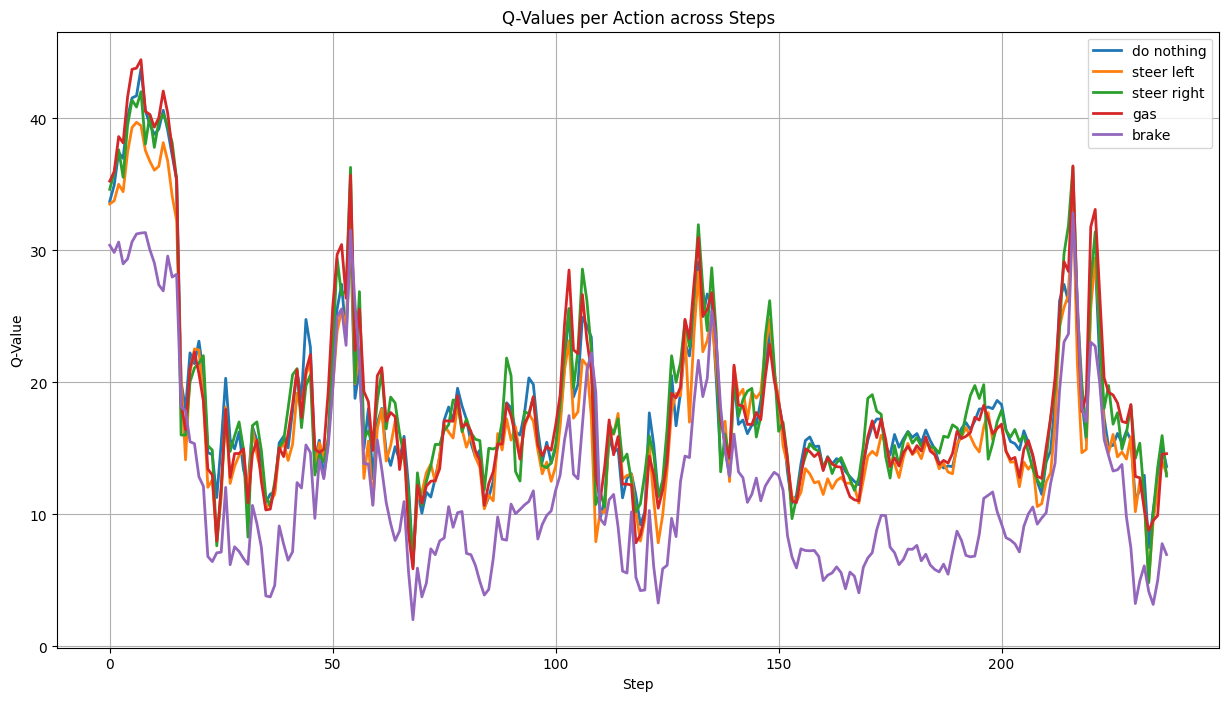

In [17]:
score_h= []

eval_env = gym.make('CarRacing-v2', continuous=False, render_mode='rgb_array')
eval_env = ImageEnv(eval_env)
    
s, _ = eval_env.reset()
state_dim = (4, 84, 84)
action_dim = eval_env.action_space.n
agent = DQN.advDQN(state_dim, action_dim, epsilon=0.1)
agent.total_steps = 100000

agent.network.load_state_dict(torch.load('data/change_reward_dqn.pt'))
agent.target_network.load_state_dict(agent.network.state_dict())
frames = []
scores = 0
q_a = []
(s, _), done, ret = eval_env.reset(), False, 0
while not done:
    frames.append(eval_env.render())
    q = agent.act(s, training=False)

    q_a.append(q.squeeze(0) )
    a = torch.argmax(q).item()
    s_prime, r, terminated, truncated, info = eval_env.step(a)
    s = s_prime
    ret += r
    done = terminated or truncated
scores += ret


print(scores)


q_values = np.stack([q.cpu().numpy() for q in q_a])

steps = np.arange(len(q_values))
# Action 이름 (리스트로!)
actions = ["do nothing", "steer left", "steer right", "gas", "brake"]


plt.figure(figsize=(15, 8))

for action in range(5):
    plt.plot(steps, q_values[:, action], label=actions[action], linewidth=2)

plt.xlabel('Step')
plt.ylabel('Q-Value')
plt.title('Q-Values per Action across Steps')
plt.legend()
plt.grid(True)
plt.show()

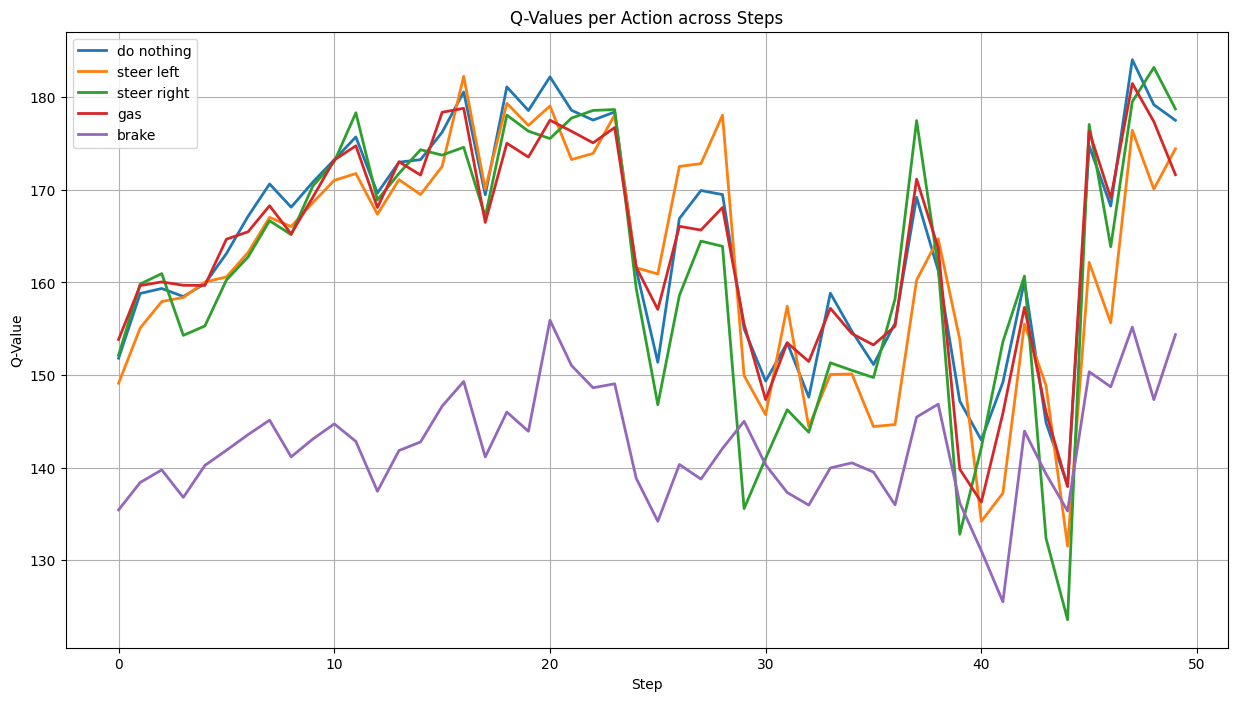

In [11]:
q_values = np.stack([q.cpu().numpy() for q in q_a])

steps = np.arange(len(q_values))
# Action 이름 (리스트로!)
actions = ["do nothing", "steer left", "steer right", "gas", "brake"]


plt.figure(figsize=(15, 8))

for action in range(5):
    plt.plot(steps[:50], q_values[:50, action], label=actions[action], linewidth=2)

plt.xlabel('Step')
plt.ylabel('Q-Value')
plt.title('Q-Values per Action across Steps')
plt.legend()
plt.grid(True)
plt.show()

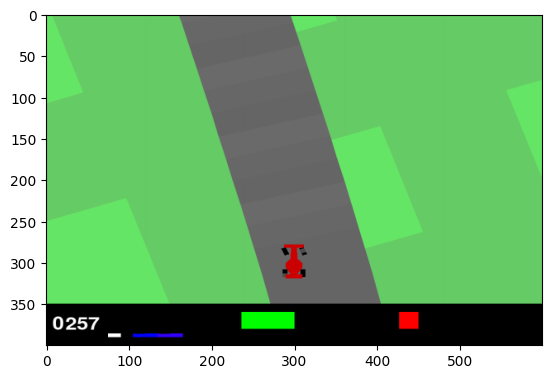

In [12]:
import matplotlib.animation as animation
fig = plt.figure()
ims = []

for frame in frames:
    im = plt.imshow(frame, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)

# 애니메이션을 저장
ani.save('qdsdsq.gif', writer='pillow')

plt.show()